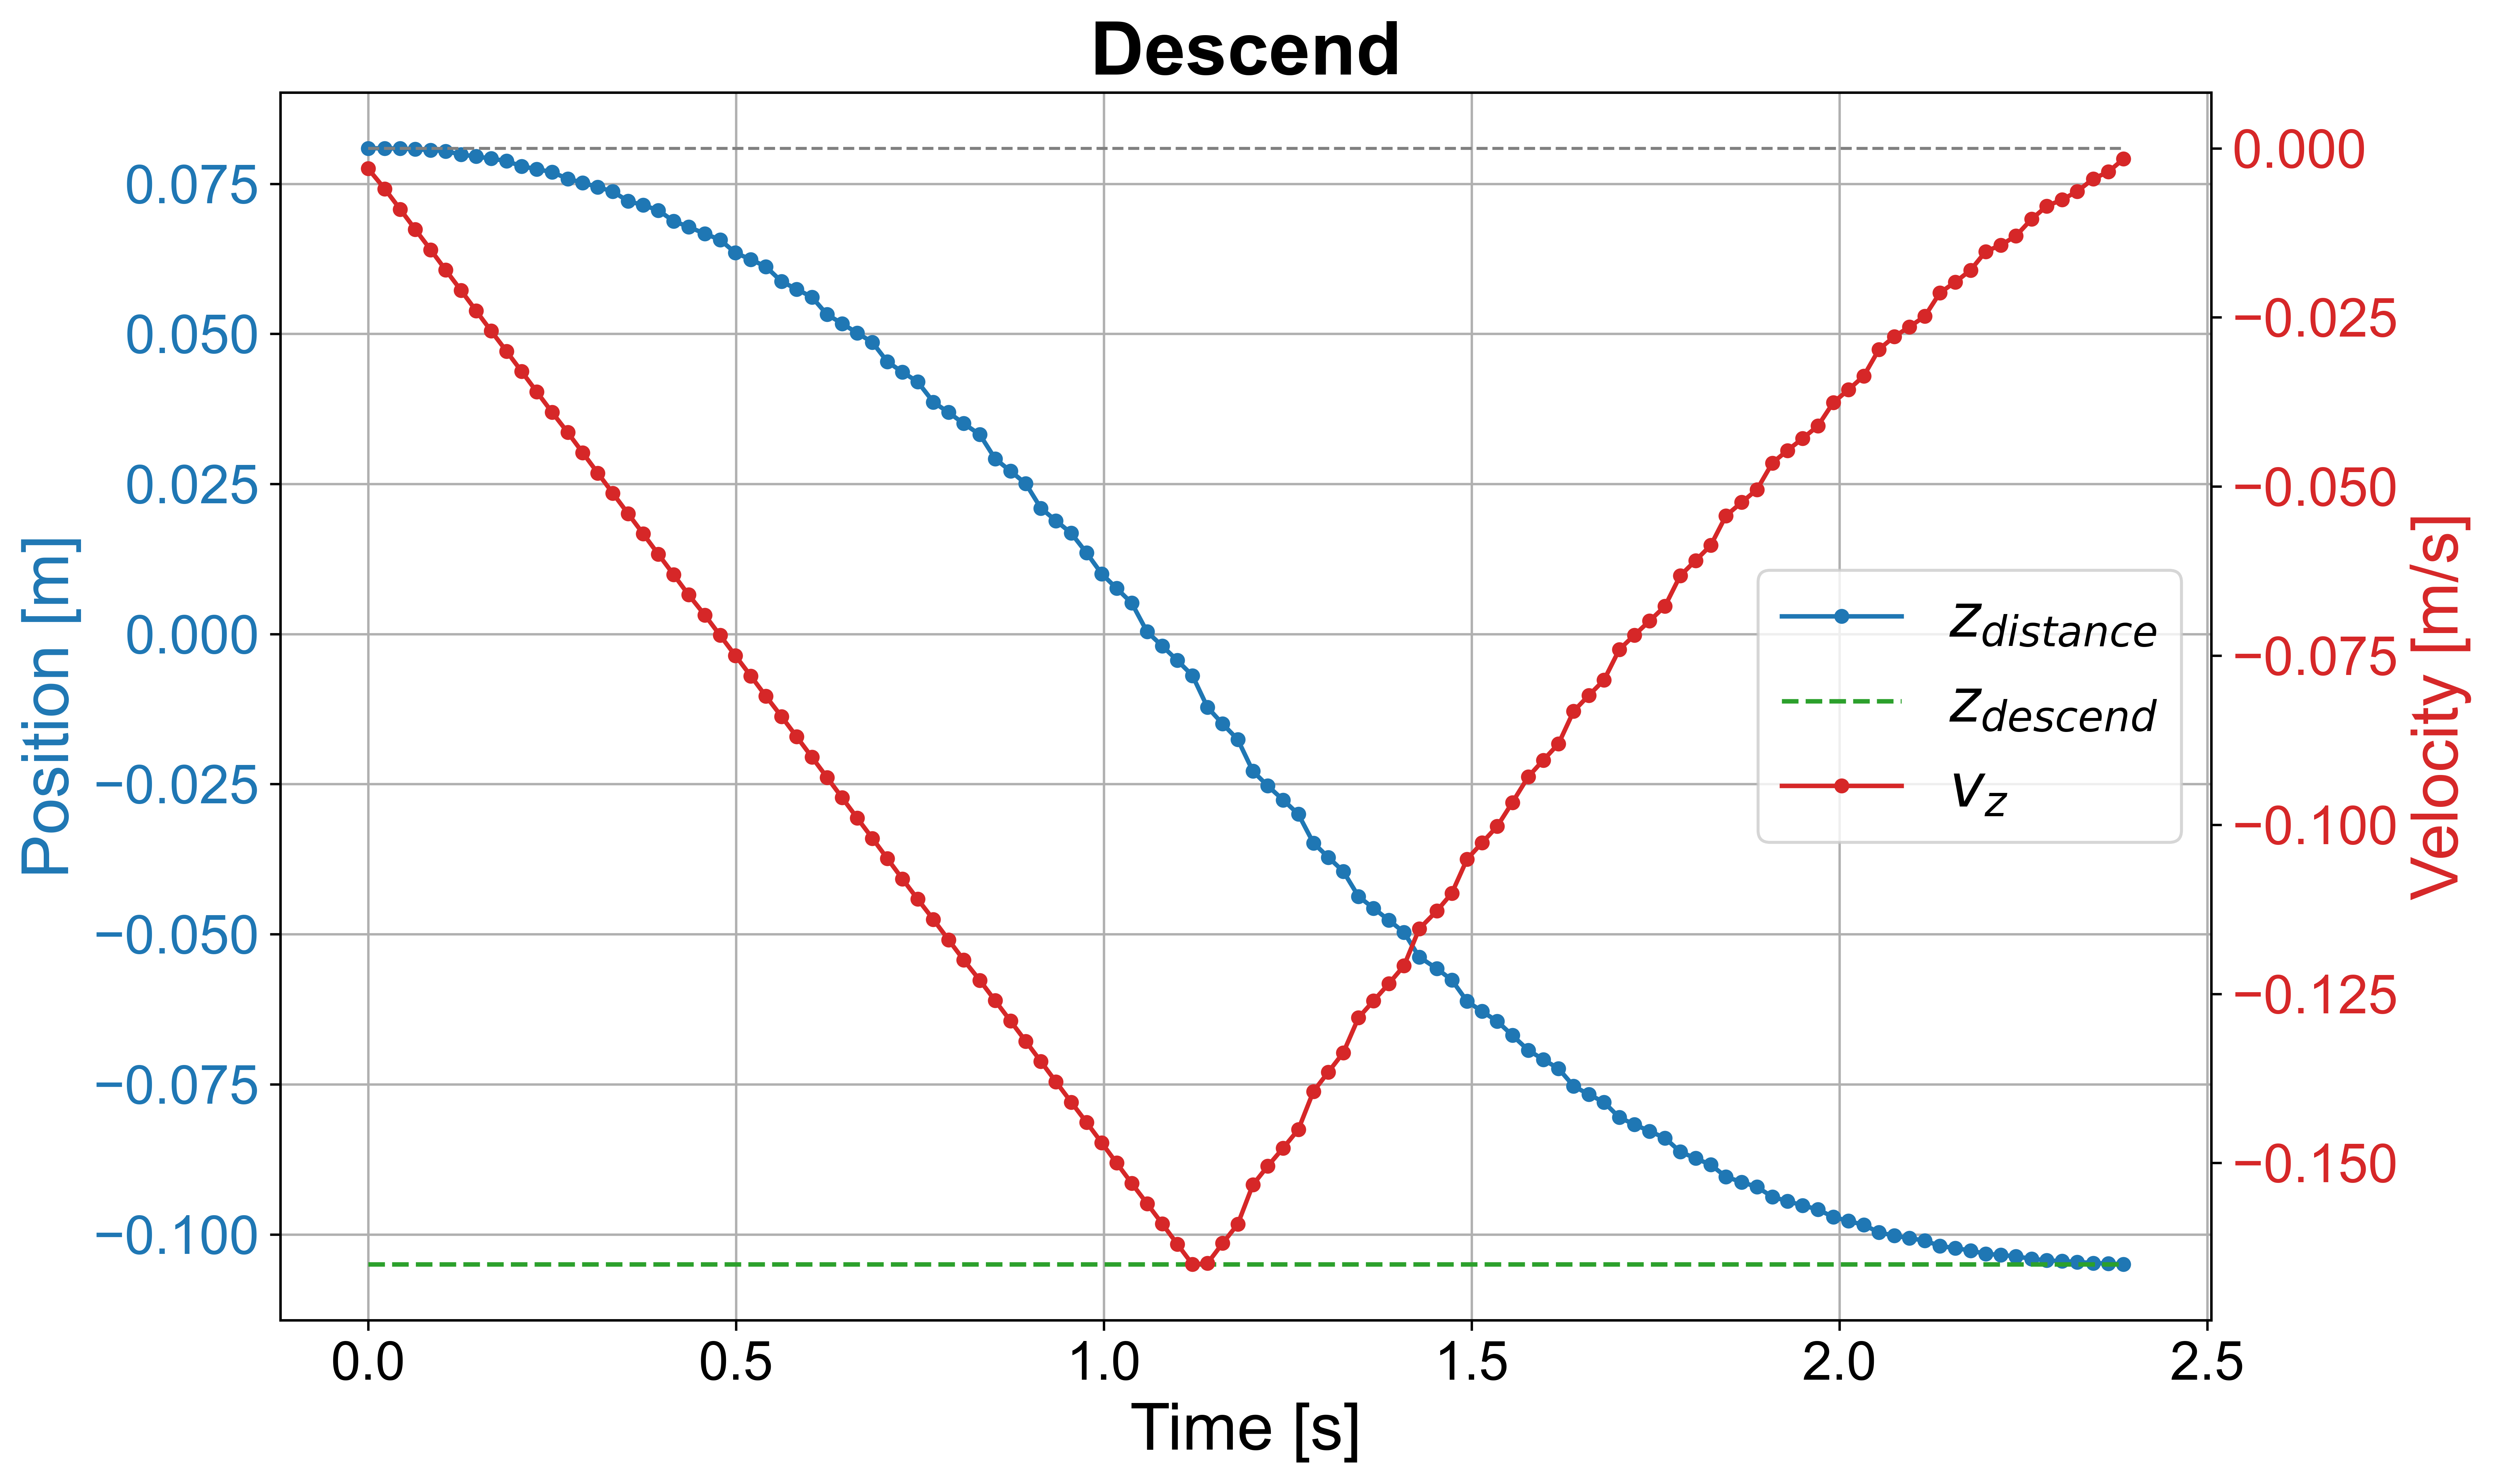

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Variables for font sizes and marker size
FONT_FAMILY = 'Arial'
FONT_SIZE_TITLE = 25
FONT_SIZE_LABEL = 22
FONT_SIZE_TICKS = 18
FONT_SIZE_LEGEND = 20
MARKER_SIZE = 4

# Load CSV
df = pd.read_csv("new_data_for_thesis/25Hz_descend.csv")

# Convert time to relative time
df["relative_time"] = df["time"] - df["time"].iloc[0]

# Set font family globally
plt.rcParams.update({'font.family': FONT_FAMILY})

# Create figure with DPI 600, size fitting A4 width and moderate height
fig, ax1 = plt.subplots(figsize=(11.69, 7), dpi=600)


# Plot position on left y-axis
ax1.plot(df["relative_time"], df["z_pos"], label="$z_{distance}$", marker="o", linestyle="-", markersize=MARKER_SIZE, color="tab:blue")
ax1.plot(df["relative_time"], df["z_target"], label="$z_{descend}$", linestyle="--", color="tab:green")
ax1.set_xlabel("Time [s]", fontsize=FONT_SIZE_LABEL)
ax1.set_ylabel("Position [m]", fontsize=FONT_SIZE_LABEL, color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue", labelsize=FONT_SIZE_TICKS)
ax1.tick_params(axis='x', labelsize=FONT_SIZE_TICKS)
ax1.grid(True)

# Create second y-axis for velocity
ax2 = ax1.twinx()
ax2.plot(df["relative_time"], df["z_speed"], label="$v_z$", marker="o", linestyle="-", markersize=MARKER_SIZE, color="tab:red")
ax2.set_ylabel("Velocity [m/s]", fontsize=FONT_SIZE_LABEL, color="tab:red")
ax2.tick_params(axis='y', labelcolor="tab:red", labelsize=FONT_SIZE_TICKS)
ax2.plot([0, df["relative_time"].iloc[-1]], [0, 0], color='gray', linestyle='--', linewidth=1)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, fontsize=FONT_SIZE_LEGEND, loc='right')

plt.title("Descend", fontsize=FONT_SIZE_TITLE, fontweight='bold')
plt.tight_layout()
plt.show()


In [15]:
fig.savefig("z_plot.pdf", bbox_inches='tight')

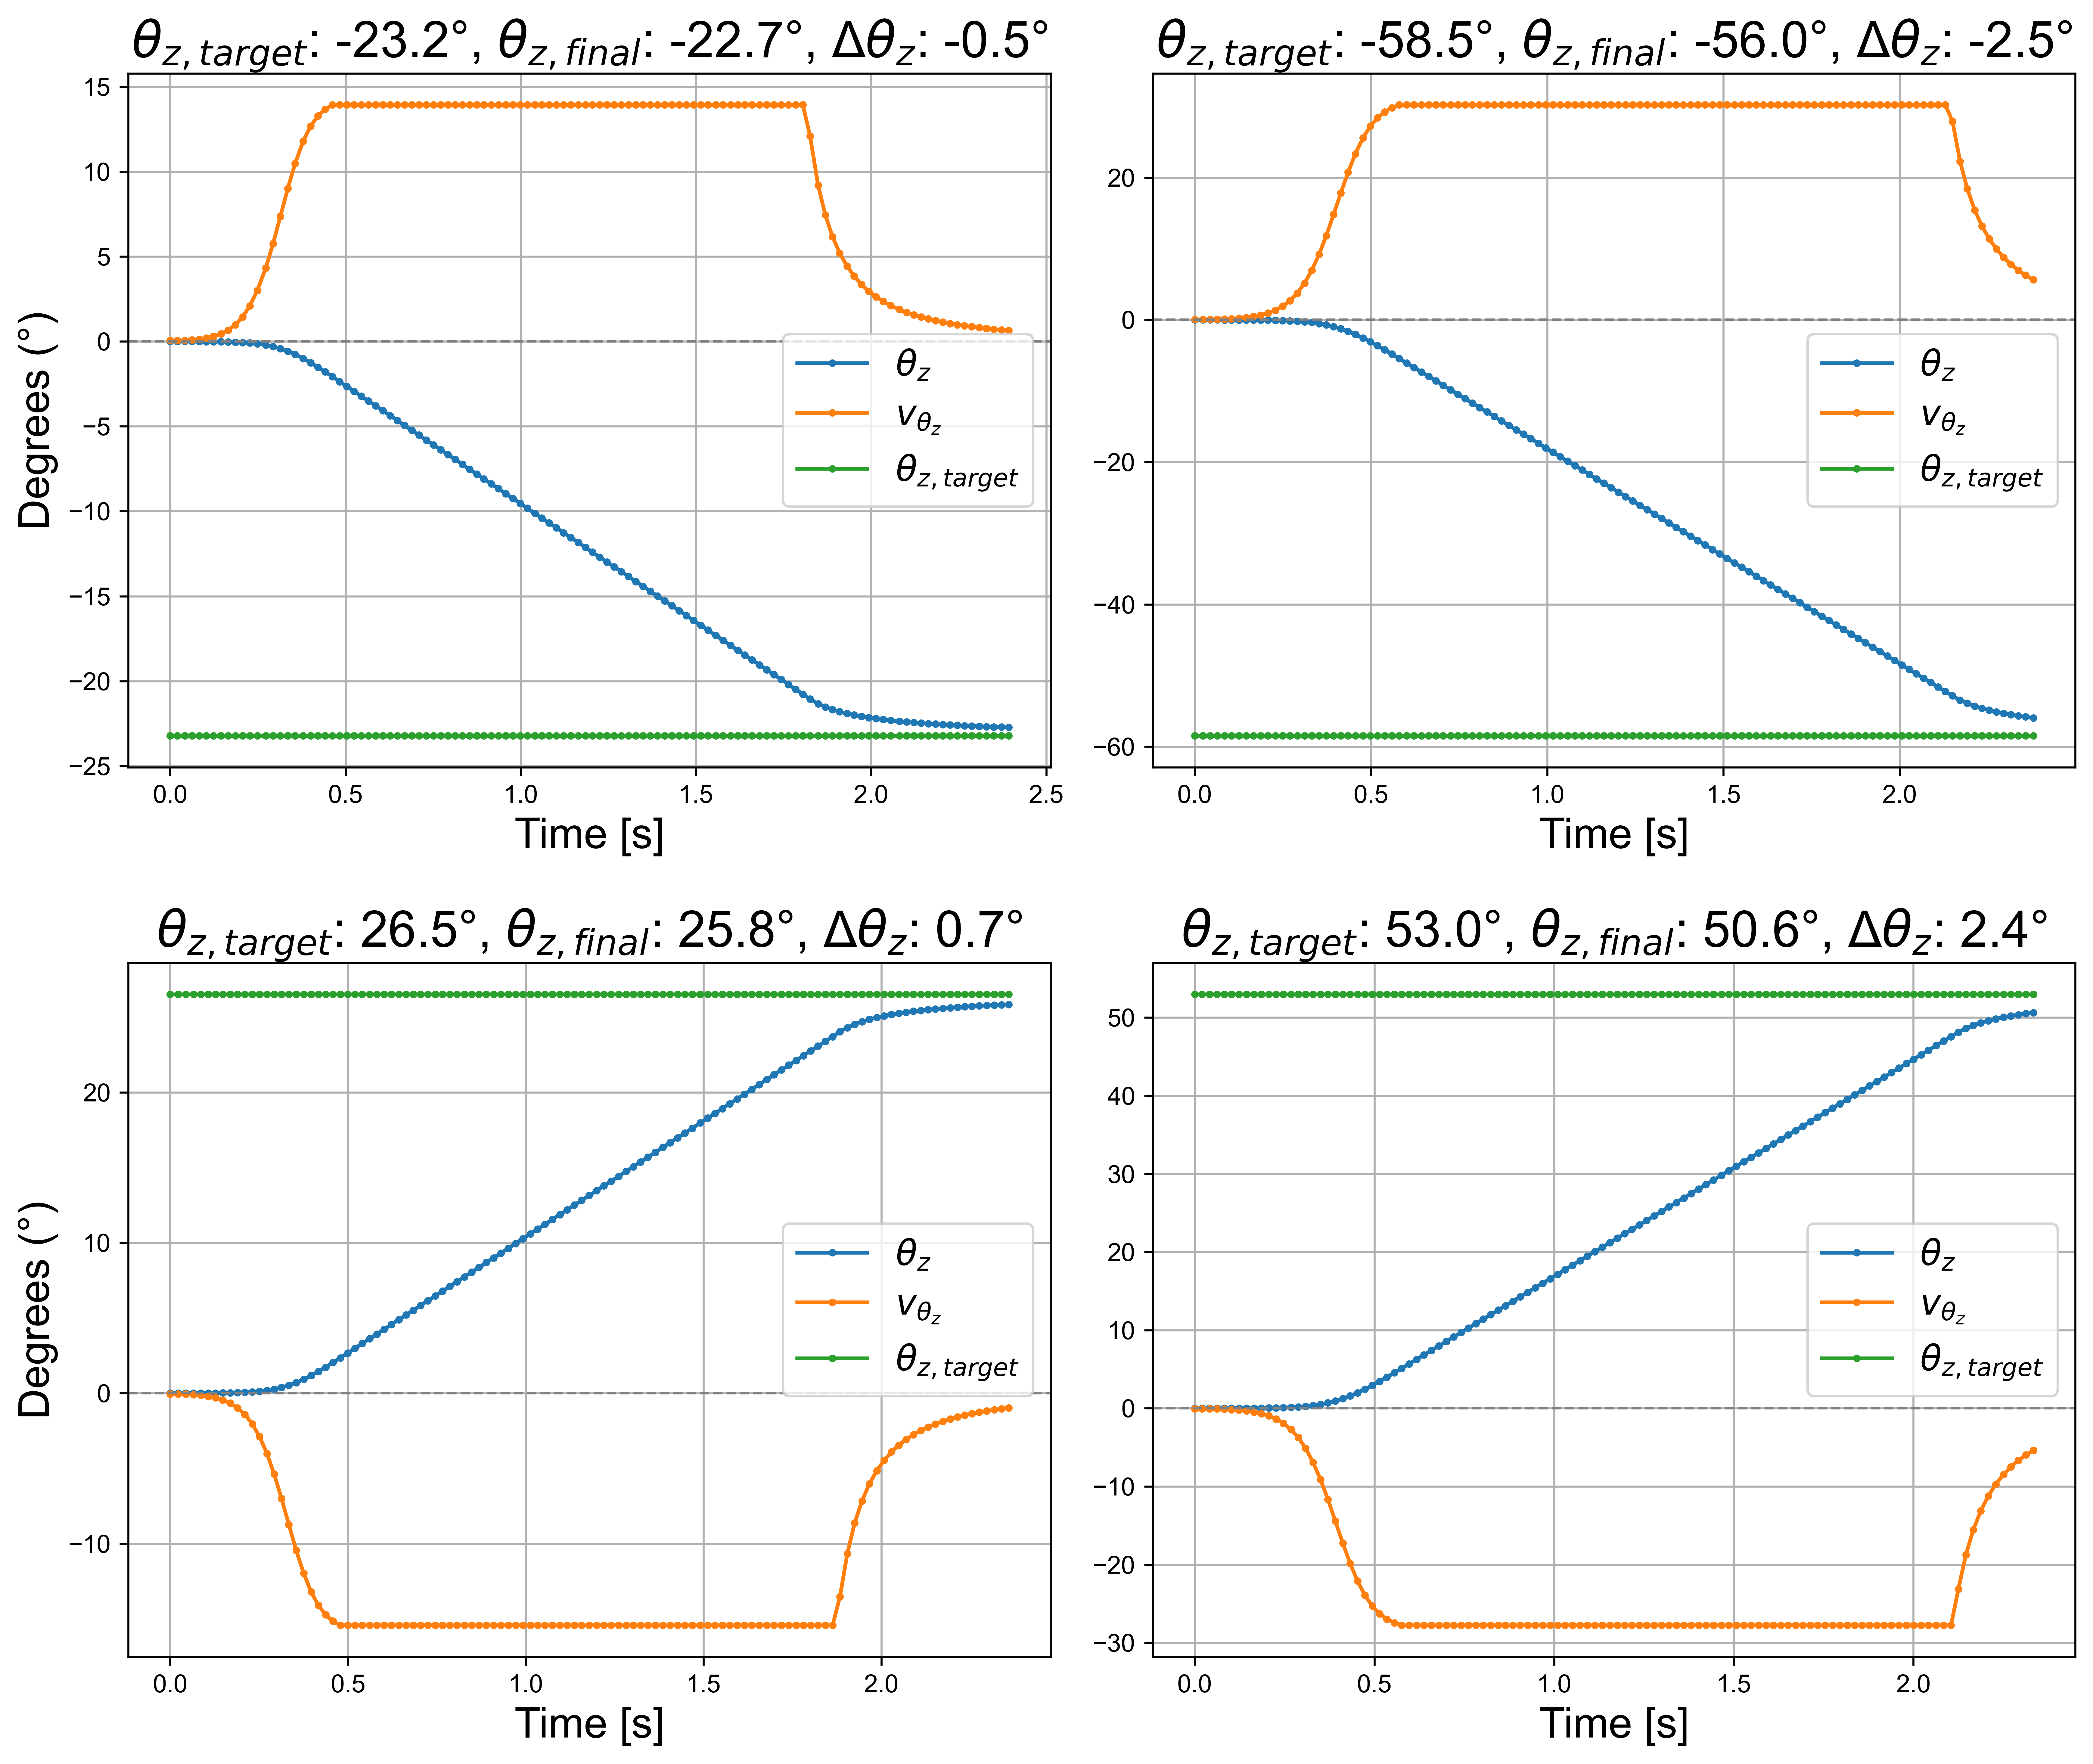

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Variables to adjust font sizes and marker size easily
FONT_FAMILY = 'Arial'
FONT_SIZE_TITLE = 20
FONT_SIZE_LABEL = 17
FONT_SIZE_LEGEND = 14
MARKER_SIZE = 2

# Load CSVs
csv_files = [
    "new_data_for_thesis/small_rotation.csv",
    "new_data_for_thesis/medium_rotation.csv",
    "new_data_for_thesis/small_negative_rotation.csv",
    "new_data_for_thesis/medium_negative_rotation.csv"
]

# Process DataFrames
def process_df(df):
    df = df.copy()
    df["relative_time"] = df["time"] - df["time"].iloc[0]
    df["rotation_deg"] = df["rotation"] * 180 / 3.14159
    df["rz_speed_deg"] = df["rz_speed"] * 180 / 3.14159
    df["rz_target_deg"] = df["rz_target"] * 180 / 3.14159
    return df

plots = [process_df(pd.read_csv(file)) for file in csv_files]

# Extract targets
targets_deg = [round(df["rz_target_deg"].iloc[0], 1) for df in plots]

# Extract final rotation and difference
final_rotations_diffs = [
    (round(df["rotation_deg"].iloc[-1], 1), round(tgt - round(df["rotation_deg"].iloc[-1], 1), 1))
    for df, tgt in zip(plots, targets_deg)
]

# Figure setup
fig, axs = plt.subplots(2, 2, figsize=(11.69, 10), dpi=600)
plt.rcParams.update({'font.family': FONT_FAMILY})

titles = [
    ["Small Rotation", "Medium Rotation"],
    ["Small Negative Rotation", "Medium Negative Rotation"]
]

for row in range(2):
    for col in range(2):
        ax = axs[row, col]
        idx = row * 2 + col
        df = plots[idx]
        target_deg = targets_deg[idx]
        actual_deg, diff = final_rotations_diffs[idx]
        
        title = (f"$θ_{{z, target}}$: {target_deg}°, "
                 f"$θ_{{z, final}}$: {actual_deg}°, Δ$θ_z$: {diff}°")
        
        ax.plot(df["relative_time"], df["rotation_deg"], label="$θ_{z}$", color='tab:blue', markersize=MARKER_SIZE, marker="o",linestyle="-")
        ax.plot(df["relative_time"], df["rz_speed_deg"], label="$v_{θ_z}$", color='tab:orange', markersize=MARKER_SIZE, marker="o",linestyle="-")
        ax.plot(df["relative_time"], df["rz_target_deg"], label="$θ_{z, target}$ ", color='tab:green', linestyle="-", markersize=MARKER_SIZE, marker="o")
        
        ax.set_title(title, fontsize=FONT_SIZE_TITLE)
        ax.set_xlabel("Time [s]", fontsize=FONT_SIZE_LABEL)
        if col == 0:
            ax.set_ylabel("Degrees (°)", fontsize=FONT_SIZE_LABEL)
        ax.grid(True)
        ax.legend(fontsize=FONT_SIZE_LEGEND, loc='right')
        ax.axhline(0, color='gray', linestyle='--', linewidth=1)  # horizontal zero line

plt.subplots_adjust(hspace=100, wspace=1)
plt.tight_layout()
plt.show()


In [43]:
fig.savefig("descend_plots.pdf", bbox_inches='tight')